In [1]:
#MODEL Training Begins...

In [2]:
#Nvidia Version

In [3]:
! nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Wed_Jul_22_19:09:35_Pacific_Daylight_Time_2020
Cuda compilation tools, release 11.0, V11.0.221
Build cuda_11.0_bu.relgpu_drvr445TC445_37.28845127_0


In [4]:
#TensorFlow version

In [5]:
import tensorflow as tf
tf.version.VERSION

'2.4.1'

In [6]:
#GPU 80% use

In [7]:
#from tensorflow.compat.v1 import ConfigProto
#from tensorflow.compat.v1 import InteractiveSession

#config = ConfigProto()
#config.gpu_options.per_process_gpu_memory_fraction = 0.8
#config.gpu_options.allow_growth = True
#session = InteractiveSession(config=config)

In [8]:
#Library Import

In [2]:
import os
import glob
import matplotlib.pyplot as plt
import numpy as np
# Keras API
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten
from keras.layers import Conv2D,MaxPooling2D,Activation,AveragePooling2D,BatchNormalization
from keras.preprocessing.image import ImageDataGenerator

In [3]:
#Data import

In [4]:
# My data is in local drive.
train_dir ="C://Users//RoboRock//Projects//Leditor2//PlantVillage//train"
test_dir="C://Users//RoboRock//Projects//Leditor2//PlantVillage//val"

In [5]:
#Image count Function

In [6]:
# function to get count of images
def get_files(directory):
  if not os.path.exists(directory):
    return 0
  count=0
  for current_path,dirs,files in os.walk(directory):
    for dr in dirs:
      count+= len(glob.glob(os.path.join(current_path,dr+"/*")))
  return count

In [7]:
train_samples =get_files(train_dir)
num_classes=len(glob.glob(train_dir+"/*"))
test_samples=get_files(test_dir)
print(num_classes,"Classes")
print(train_samples,"Train images")
print(test_samples,"Test images")

45 Classes
46338 Train images
11281 Test images


In [8]:
# Pre-processing data with parameters.
train_datagen=ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)

In [9]:
# set height and width and color of input image.
img_width,img_height =256,256
input_shape=(img_width,img_height,3)
batch_size =32
train_generator =train_datagen.flow_from_directory(train_dir,
                                target_size=(img_width,img_height),                                                    
                                                   batch_size=batch_size)
test_generator=test_datagen.flow_from_directory(test_dir,shuffle=True,target_size=(img_width,img_height),       
                                                batch_size=batch_size)

Found 46338 images belonging to 45 classes.
Found 11281 images belonging to 45 classes.


In [10]:
# The name of the 12 diseases.
train_generator.class_indices

{'Apple___Apple_scab': 0,
 'Apple___Black_rot': 1,
 'Apple___Cedar_apple_rust': 2,
 'Apple___healthy': 3,
 'Blueberry___healthy': 4,
 'Cherry_(including_sour)___Powdery_mildew': 5,
 'Cherry_(including_sour)___healthy': 6,
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 7,
 'Corn_(maize)___Common_rust_': 8,
 'Corn_(maize)___Northern_Leaf_Blight': 9,
 'Corn_(maize)___healthy': 10,
 'Grape___Black_rot': 11,
 'Grape___Esca_(Black_Measles)': 12,
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 13,
 'Grape___healthy': 14,
 'Orange___Haunglongbing_(Citrus_greening)': 15,
 'Peach___Bacterial_spot': 16,
 'Peach___healthy': 17,
 'Pepper,_bell___Bacterial_spot': 18,
 'Pepper,_bell___healthy': 19,
 'Potato___Early_blight': 20,
 'Potato___Late_blight': 21,
 'Potato___healthy': 22,
 'Raspberry___healthy': 23,
 'Soybean___healthy': 24,
 'Squash___Powdery_mildew': 25,
 'Strawberry___Leaf_scorch': 26,
 'Strawberry___healthy': 27,
 'Tomato___Bacterial_spot': 28,
 'Tomato___Early_blight': 29,
 'Toma

In [11]:
#CNN Parameter Building

In [12]:
# CNN building.
model = Sequential()
model.add(Conv2D(32, (5, 5),input_shape=input_shape,activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Conv2D(32, (3, 3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))   
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(128,activation='relu'))          
model.add(Dense(num_classes,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 252, 252, 32)      2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 84, 84, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 82, 82, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 41, 41, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 39, 39, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 19, 19, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 23104)             0

In [13]:
model_layers = [ layer.name for layer in model.layers]
print('layer name : ',model_layers)

layer name :  ['conv2d', 'max_pooling2d', 'conv2d_1', 'max_pooling2d_1', 'conv2d_2', 'max_pooling2d_2', 'flatten', 'dense', 'dropout', 'dense_1', 'dense_2']


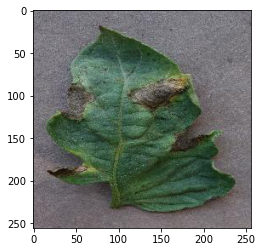

In [14]:
from keras.preprocessing import image
import numpy as np
img1 = image.load_img("C:\\Users\\RoboRock\\Projects\\Leditor2\\PlantVillage\\train\\Tomato___Early_blight\\1.jpg")
plt.imshow(img1);
#preprocess image
img1 = image.load_img("C:\\Users\\RoboRock\\Projects\\Leditor2\\PlantVillage\\train\\Tomato___Early_blight\\1.jpg", 
                      target_size=(256, 256))
img = image.img_to_array(img1)
img = img/255
img = np.expand_dims(img, axis=0)

In [15]:
# Visualizing output after every layer.

In [16]:
from keras.models import Model
conv2d_1_output = Model(inputs=model.input, outputs=model.get_layer('conv2d').output)
max_pooling2d_1_output = Model(inputs=model.input,outputs=model.get_layer('max_pooling2d').output)
conv2d_2_output = Model(inputs=model.input,outputs=model.get_layer('conv2d_1').output)
max_pooling2d_2_output = Model(inputs=model.input,outputs=model.get_layer('max_pooling2d_1').output)
conv2d_3_output = Model(inputs=model.input,outputs=model.get_layer('conv2d_2').output)
max_pooling2d_3_output = Model(inputs=model.input,outputs=model.get_layer('max_pooling2d_2').output)
flatten_1_output = Model(inputs=model.input,outputs=model.get_layer('flatten').output)
conv2d_1_features = conv2d_1_output.predict(img)
max_pooling2d_1_features = max_pooling2d_1_output.predict(img)
conv2d_2_features = conv2d_2_output.predict(img)
max_pooling2d_2_features = max_pooling2d_2_output.predict(img)
conv2d_3_features = conv2d_3_output.predict(img)
max_pooling2d_3_features = max_pooling2d_3_output.predict(img)
flatten_1_features = flatten_1_output.predict(img)

In [24]:
#Filered images

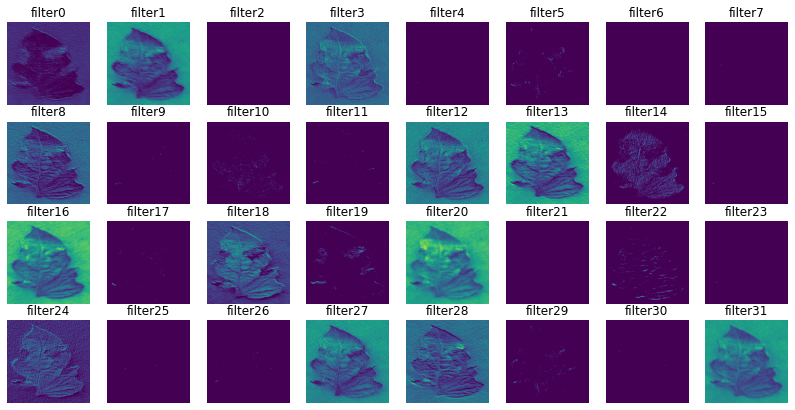

In [25]:
import matplotlib.image as mpimg

fig=plt.figure(figsize=(14,7))
columns = 8
rows = 4
for i in range(columns*rows):
    #img = mpimg.imread()
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(conv2d_1_features[0, :, :, i], cmap='viridis') # Visualizing in color mode.
plt.show()

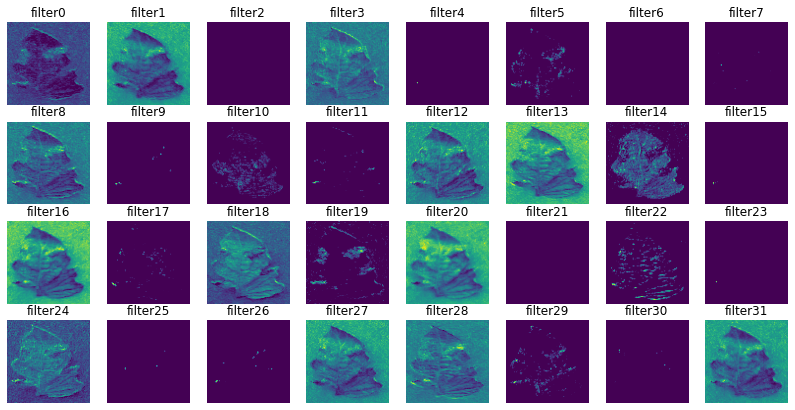

In [26]:
import matplotlib.image as mpimg

fig=plt.figure(figsize=(14,7))
columns = 8
rows = 4
for i in range(columns*rows):
    #img = mpimg.imread()
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(max_pooling2d_1_features[0, :, :, i], cmap='viridis')
plt.show()

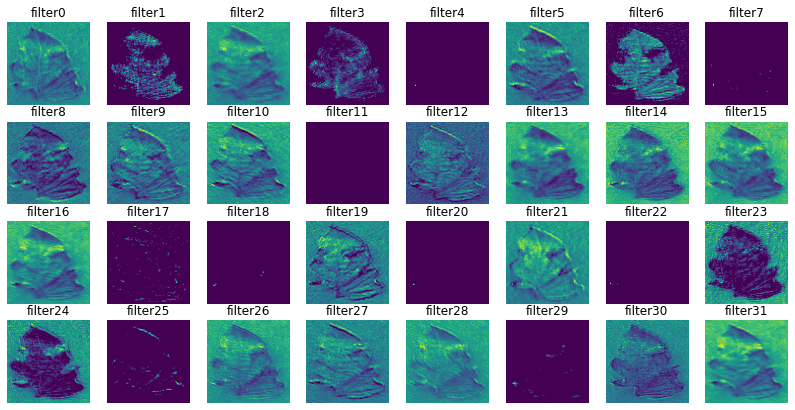

In [27]:
import matplotlib.image as mpimg

fig=plt.figure(figsize=(14,7))
columns = 8
rows = 4
for i in range(columns*rows):
    #img = mpimg.imread()
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(conv2d_2_features[0, :, :, i], cmap='viridis')
plt.show()

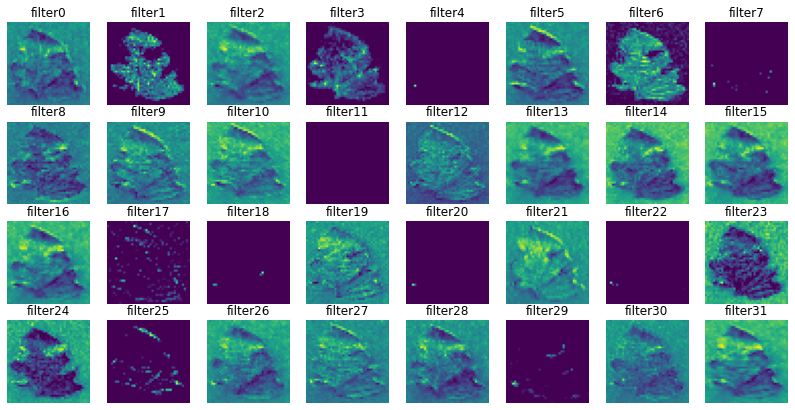

In [28]:
# we can also visualize in color mode.
import matplotlib.image as mpimg

fig=plt.figure(figsize=(14,7))
columns = 8
rows = 4
for i in range(columns*rows):
    #img = mpimg.imread()
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(max_pooling2d_2_features[0, :, :, i], cmap='viridis') 
plt.show()

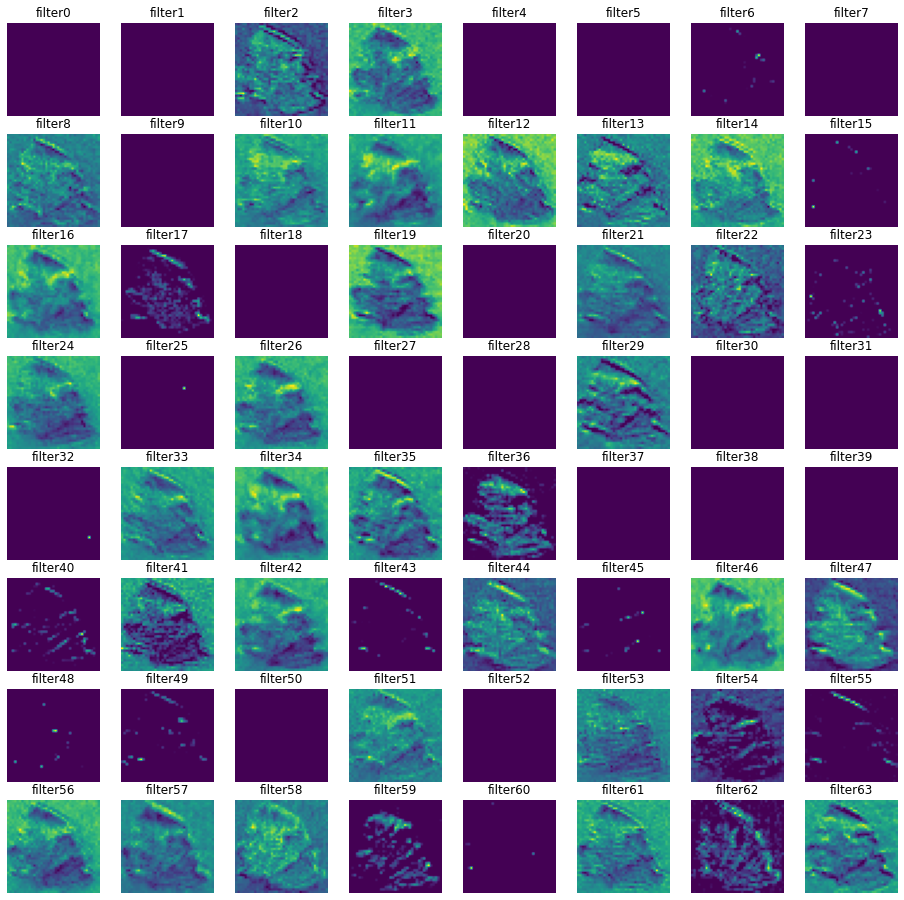

In [29]:
import matplotlib.image as mpimg

fig=plt.figure(figsize=(16,16))
columns =8 
rows = 8
for i in range(columns*rows):
    #img = mpimg.imread()
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(conv2d_3_features[0, :, :, i], cmap='viridis')
plt.show()

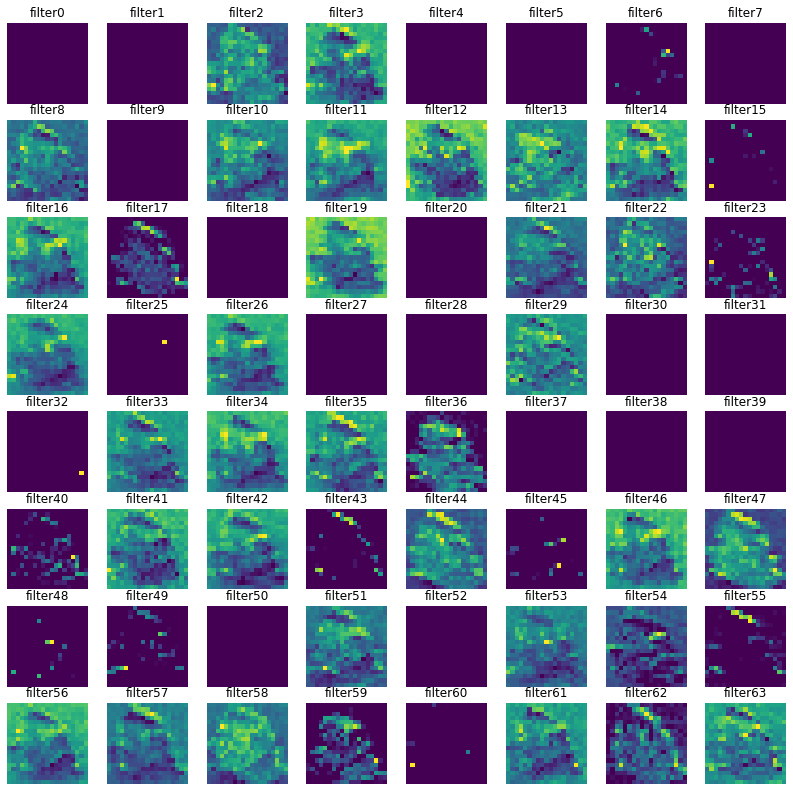

In [30]:
import matplotlib.image as mpimg

fig=plt.figure(figsize=(14,14))
columns = 8
rows = 8
for i in range(columns*rows):
    #img = mpimg.imread()
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(max_pooling2d_3_features[0, :, :, i],cmap='viridis')
plt.show()

In [31]:
#Model training

In [17]:
validation_generator = train_datagen.flow_from_directory(
                       train_dir, # same directory as training data
                       target_size=(img_height, img_width),
                       batch_size=batch_size)

Found 46338 images belonging to 45 classes.


In [18]:
# Model building to get trained with parameters.
#opt=keras.optimizers.Adam(lr=0.001)
#model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])

In [33]:
# Model building to get trained with parameters.
opt=keras.optimizers.Adam(lr=0.001)
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])
train=model.fit(train_generator,
                          epochs=21,
                          steps_per_epoch=train_generator.samples // batch_size,
                          validation_data=validation_generator,
                          validation_steps= validation_generator.samples // batch_size,
                          verbose=1,workers=1)

Epoch 1/21
1449/1449 [==============================] - 1592s 1s/step - loss: 1.9461 - accuracy: 0.4715 - val_loss: 0.6377 - val_accuracy: 0.7990
Epoch 2/21
1449/1449 [==============================] - 1522s 1s/step - loss: 0.6568 - accuracy: 0.7935 - val_loss: 0.4115 - val_accuracy: 0.8657
Epoch 3/21
1449/1449 [==============================] - 1516s 1s/step - loss: 0.4818 - accuracy: 0.8440 - val_loss: 0.2657 - val_accuracy: 0.9116
Epoch 4/21
1449/1449 [==============================] - 1670s 1s/step - loss: 0.3670 - accuracy: 0.8797 - val_loss: 0.2897 - val_accuracy: 0.9061
Epoch 5/21
1449/1449 [==============================] - 1709s 1s/step - loss: 0.3193 - accuracy: 0.8978 - val_loss: 0.1919 - val_accuracy: 0.9347
Epoch 6/21
1449/1449 [==============================] - 1799s 1s/step - loss: 0.2915 - accuracy: 0.9047 - val_loss: 0.1527 - val_accuracy: 0.9490
Epoch 7/21
1449/1449 [==============================] - 1913s 1s/step - loss: 0.2616 - accuracy: 0.9158 - val_loss: 0.1342 -

In [34]:
#Plot Accuracy and Loss graph

In [19]:
acc = train.history['accuracy']
val_acc = train.history['val_accuracy']
loss = train.history['loss']
val_loss = train.history['val_loss']
epochs = range(1, len(acc) + 1)
#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()

plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()

NameError: name 'train' is not defined

In [36]:
#Evaluate model using unseen data

In [20]:
score,accuracy =model.evaluate(test_generator,verbose=1)
print("Test score is {}".format(score))
print("Test accuracy is {}".format(accuracy))

353/353 [==============================] - 32s 89ms/step - loss: 3.8064 - accuracy: 0.0252
Test score is 3.8069443702697754
Test accuracy is 0.024554559960961342


In [38]:
# Save model

In [39]:
from keras.models import load_model
model.save('model.h5')

In [40]:
# Save model weights.
from keras.models import load_model
model.save_weights('model_weights.h5')

In [21]:
# Get classes of model trained on
classes = train_generator.class_indices 
classes

{'Apple___Apple_scab': 0,
 'Apple___Black_rot': 1,
 'Apple___Cedar_apple_rust': 2,
 'Apple___healthy': 3,
 'Blueberry___healthy': 4,
 'Cherry_(including_sour)___Powdery_mildew': 5,
 'Cherry_(including_sour)___healthy': 6,
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 7,
 'Corn_(maize)___Common_rust_': 8,
 'Corn_(maize)___Northern_Leaf_Blight': 9,
 'Corn_(maize)___healthy': 10,
 'Grape___Black_rot': 11,
 'Grape___Esca_(Black_Measles)': 12,
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 13,
 'Grape___healthy': 14,
 'Orange___Haunglongbing_(Citrus_greening)': 15,
 'Peach___Bacterial_spot': 16,
 'Peach___healthy': 17,
 'Pepper,_bell___Bacterial_spot': 18,
 'Pepper,_bell___healthy': 19,
 'Potato___Early_blight': 20,
 'Potato___Late_blight': 21,
 'Potato___healthy': 22,
 'Raspberry___healthy': 23,
 'Soybean___healthy': 24,
 'Squash___Powdery_mildew': 25,
 'Strawberry___Leaf_scorch': 26,
 'Strawberry___healthy': 27,
 'Tomato___Bacterial_spot': 28,
 'Tomato___Early_blight': 29,
 'Toma

In [22]:
# Loading model and predict.

In [23]:

from keras.models import load_model
model=load_model('model.h5')
# Mention name of the disease into list.
Classes = ['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___healthy',
 'background',
 'fresh cotton leaf',
 'fresh cotton plant',
 'fusarium wilt diseased cotton leaf',
 'fusarium wilt diseased cotton plant',
 'mango_Anthracnose',
 'mango_healthy']

In [24]:
#TXT File out...

In [25]:

labels = '\n'.join(sorted(train_generator.class_indices.keys()))

with open('labels.txt', 'w') as f:
  f.write(labels)

In [26]:
#Prediction

Tomato___Bacterial_spot


C:\Anaconda\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


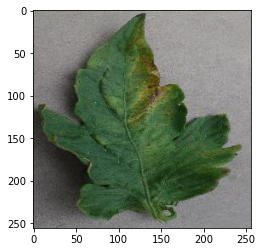

In [27]:
import numpy as np
import matplotlib.pyplot as plt
# Pre-Processing test data same as train data.
img_width=256
img_height=256
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
from keras.preprocessing import image
def prepare(img_path):
    img = image.load_img(img_path, target_size=(256, 256))
    x = image.img_to_array(img)
    x = x/255
    return np.expand_dims(x, axis=0)
    
    
result = model.predict_classes([prepare('C:\\Users\\RoboRock\\Projects\\Leditor2\\PlantVillage\\val\\Tomato___Bacterial_spot\\1.jpg')])
disease=image.load_img('C:\\Users\\RoboRock\\Projects\\Leditor2\\PlantVillage\\val\\Tomato___Bacterial_spot\\1.jpg')
plt.imshow(disease)
print (Classes[int(result)])

In [28]:
#C:\\Users\\RoboRock\\Projects\\Leditor2\\Check\\1grape healthy.jpg

Apple___healthy


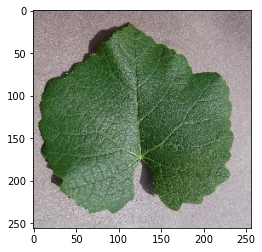

In [29]:
result1 = model.predict_classes([prepare('C:\\Users\\RoboRock\\Projects\\Leditor2\\Check\\Apple___healthy.jpg')])
disease1=image.load_img('C:\\Users\\RoboRock\\Projects\\Leditor2\\Check\\1grape healthy.jpg')
plt.imshow(disease1)
print (Classes[int(result1)])

In [50]:
#C:\\Users\\RoboRock\\Projects\\Leditor2\\Check\\2grape rot.JPG

Apple___Apple_scab


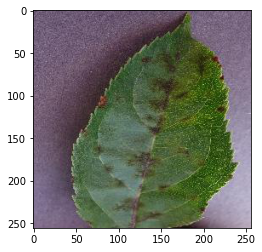

In [58]:
result2 = model.predict_classes([prepare('C:\\Users\\RoboRock\\Projects\\Leditor2\\Check\\Apple___Apple_scab.JPG')])
disease2=image.load_img('C:\\Users\\RoboRock\\Projects\\Leditor2\\Check\\Apple___Apple_scab.JPG')
plt.imshow(disease2)
print (Classes[int(result2)])

Apple___Black_rot


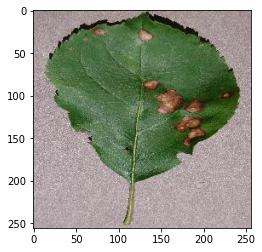

In [59]:
result3 = model.predict_classes([prepare('C:\\Users\\RoboRock\\Projects\\Leditor2\\Check\\Apple___Black_rot.JPG')])
disease3=image.load_img('C:\\Users\\RoboRock\\Projects\\Leditor2\\Check\\Apple___Black_rot.JPG')
plt.imshow(disease3)
print (Classes[int(result3)])

Apple___Cedar_apple_rust


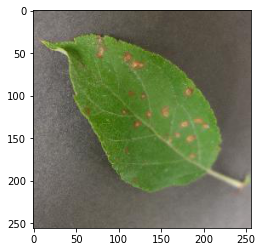

In [61]:
result4 = model.predict_classes([prepare('C:\\Users\\RoboRock\\Projects\\Leditor2\\Check\\Apple___Cedar_apple_rust.JPG')])
disease4=image.load_img('C:\\Users\\RoboRock\\Projects\\Leditor2\\Check\\Apple___Cedar_apple_rust.JPG')
plt.imshow(disease4)
print (Classes[int(result4)])

Blueberry___healthy


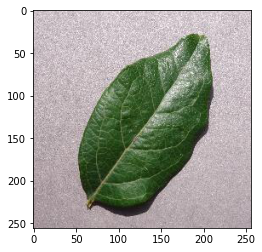

In [62]:
result5 = model.predict_classes([prepare('C:\\Users\\RoboRock\\Projects\\Leditor2\\Check\\Blueberry___healthy.JPG')])
disease5=image.load_img('C:\\Users\\RoboRock\\Projects\\Leditor2\\Check\\Blueberry___healthy.JPG')
plt.imshow(disease5)
print (Classes[int(result5)])

Cherry_(including_sour)___Powdery_mildew


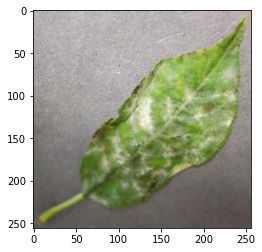

In [63]:
result6 = model.predict_classes([prepare('C:\\Users\\RoboRock\\Projects\\Leditor2\\Check\\Cherry_(including_sour)___Powdery_mildew.JPG')])
disease6=image.load_img('C:\\Users\\RoboRock\\Projects\\Leditor2\\Check\\Cherry_(including_sour)___Powdery_mildew.JPG')
plt.imshow(disease6)
print (Classes[int(result6)])

Cherry_(including_sour)___healthy


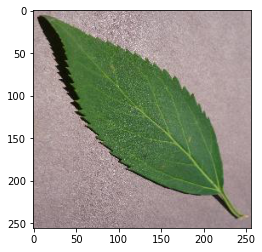

In [64]:
result7 = model.predict_classes([prepare('C:\\Users\\RoboRock\\Projects\\Leditor2\\Check\\Cherry_(including_sour)___healthy.JPG')])
disease7=image.load_img('C:\\Users\\RoboRock\\Projects\\Leditor2\\Check\\Cherry_(including_sour)___healthy.JPG')
plt.imshow(disease7)
print (Classes[int(result7)])

Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot


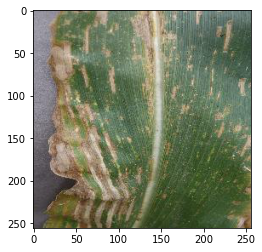

In [65]:
result8 = model.predict_classes([prepare('C:\\Users\\RoboRock\\Projects\\Leditor2\\Check\\Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot.JPG')])
disease8=image.load_img('C:\\Users\\RoboRock\\Projects\\Leditor2\\Check\\Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot.JPG')
plt.imshow(disease8)
print (Classes[int(result8)])

Corn_(maize)___Common_rust_


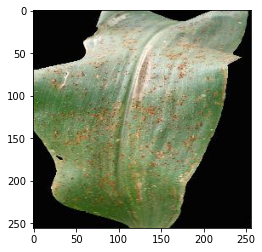

In [66]:
result9 = model.predict_classes([prepare('C:\\Users\\RoboRock\\Projects\\Leditor2\\Check\\Corn_(maize)___Common_rust_.JPG')])
disease9=image.load_img('C:\\Users\\RoboRock\\Projects\\Leditor2\\Check\\Corn_(maize)___Common_rust_.JPG')
plt.imshow(disease9)
print (Classes[int(result9)])

Corn_(maize)___Northern_Leaf_Blight


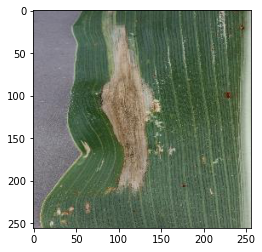

In [67]:
result10 = model.predict_classes([prepare('C:\\Users\\RoboRock\\Projects\\Leditor2\\Check\\Corn_(maize)___Northern_Leaf_Blight.JPG')])
disease10=image.load_img('C:\\Users\\RoboRock\\Projects\\Leditor2\\Check\\Corn_(maize)___Northern_Leaf_Blight.JPG')
plt.imshow(disease10)
print (Classes[int(result10)])

Corn_(maize)___healthy


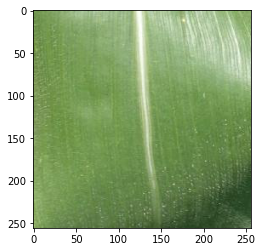

In [68]:
result11 = model.predict_classes([prepare('C:\\Users\\RoboRock\\Projects\\Leditor2\\Check\\Corn_(maize)___healthy.JPG')])
disease11=image.load_img('C:\\Users\\RoboRock\\Projects\\Leditor2\\Check\\Corn_(maize)___healthy.JPG')
plt.imshow(disease11)
print (Classes[int(result11)])

Grape___Black_rot


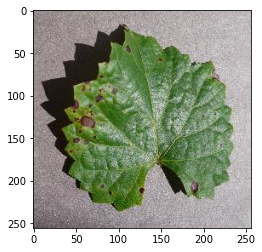

In [69]:
result12 = model.predict_classes([prepare('C:\\Users\\RoboRock\\Projects\\Leditor2\\Check\\Grape___Black_rot.JPG')])
disease12=image.load_img('C:\\Users\\RoboRock\\Projects\\Leditor2\\Check\\Grape___Black_rot.JPG')
plt.imshow(disease12)
print (Classes[int(result12)])

Grape___Esca_(Black_Measles)


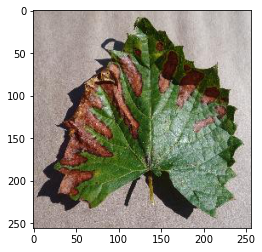

In [70]:
result13 = model.predict_classes([prepare('C:\\Users\\RoboRock\\Projects\\Leditor2\\Check\\Grape___Esca_(Black_Measles).JPG')])
disease13=image.load_img('C:\\Users\\RoboRock\\Projects\\Leditor2\\Check\\Grape___Esca_(Black_Measles).JPG')
plt.imshow(disease13)
print (Classes[int(result13)])

Grape___Leaf_blight_(Isariopsis_Leaf_Spot)


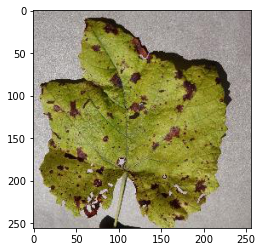

In [71]:
result14 = model.predict_classes([prepare('C:\\Users\\RoboRock\\Projects\\Leditor2\\Check\\Grape___Leaf_blight_(Isariopsis_Leaf_Spot).JPG')])
disease14=image.load_img('C:\\Users\\RoboRock\\Projects\\Leditor2\\Check\\Grape___Leaf_blight_(Isariopsis_Leaf_Spot).JPG')
plt.imshow(disease14)
print (Classes[int(result14)])

Grape___healthy


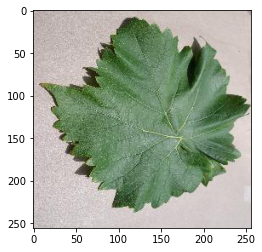

In [72]:
result15 = model.predict_classes([prepare('C:\\Users\\RoboRock\\Projects\\Leditor2\\Check\\Grape___healthy.JPG')])
disease15=image.load_img('C:\\Users\\RoboRock\\Projects\\Leditor2\\Check\\Grape___healthy.JPG')
plt.imshow(disease15)
print (Classes[int(result15)])

Orange___Haunglongbing_(Citrus_greening)


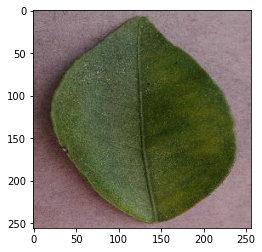

In [73]:
result16 = model.predict_classes([prepare('C:\\Users\\RoboRock\\Projects\\Leditor2\\Check\\Orange___Haunglongbing_(Citrus_greening).JPG')])
disease16=image.load_img('C:\\Users\\RoboRock\\Projects\\Leditor2\\Check\\Orange___Haunglongbing_(Citrus_greening).JPG')
plt.imshow(disease16)
print (Classes[int(result16)])

Peach___Bacterial_spot


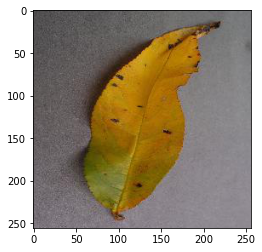

In [74]:
result17 = model.predict_classes([prepare('C:\\Users\\RoboRock\\Projects\\Leditor2\\Check\\Peach___Bacterial_spot.JPG')])
disease17=image.load_img('C:\\Users\\RoboRock\\Projects\\Leditor2\\Check\\Peach___Bacterial_spot.JPG')
plt.imshow(disease17)
print (Classes[int(result17)])

Peach___healthy


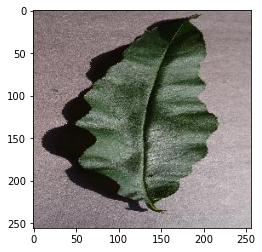

In [75]:
result18 = model.predict_classes([prepare('C:\\Users\\RoboRock\\Projects\\Leditor2\\Check\\Peach___healthy.JPG')])
disease18=image.load_img('C:\\Users\\RoboRock\\Projects\\Leditor2\\Check\\Peach___healthy.JPG')
plt.imshow(disease18)
print (Classes[int(result18)])

Pepper,_bell___Bacterial_spot


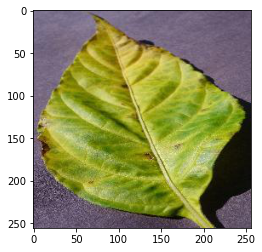

In [76]:
result19 = model.predict_classes([prepare('C:\\Users\\RoboRock\\Projects\\Leditor2\\Check\\Pepper,_bell___Bacterial_spot.JPG')])
disease19=image.load_img('C:\\Users\\RoboRock\\Projects\\Leditor2\\Check\\Pepper,_bell___Bacterial_spot.JPG')
plt.imshow(disease19)
print (Classes[int(result19)])

Pepper,_bell___healthy


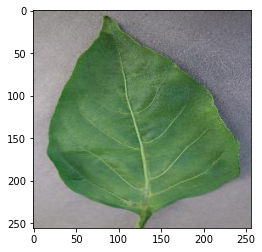

In [77]:
result20 = model.predict_classes([prepare('C:\\Users\\RoboRock\\Projects\\Leditor2\\Check\\Pepper,_bell___healthy.JPG')])
disease20=image.load_img('C:\\Users\\RoboRock\\Projects\\Leditor2\\Check\\Pepper,_bell___healthy.JPG')
plt.imshow(disease20)
print (Classes[int(result20)])

Potato___Early_blight


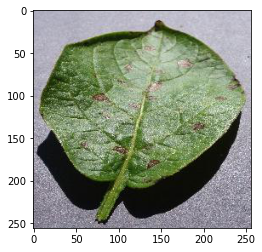

In [78]:
result21 = model.predict_classes([prepare('C:\\Users\\RoboRock\\Projects\\Leditor2\\Check\\Potato___Early_blight.JPG')])
disease21=image.load_img('C:\\Users\\RoboRock\\Projects\\Leditor2\\Check\\Potato___Early_blight.JPG')
plt.imshow(disease21)
print (Classes[int(result21)])

Potato___Late_blight


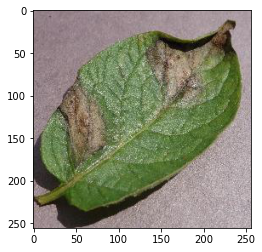

In [79]:
result22 = model.predict_classes([prepare('C:\\Users\\RoboRock\\Projects\\Leditor2\\Check\\Potato___Late_blight.JPG')])
disease22=image.load_img('C:\\Users\\RoboRock\\Projects\\Leditor2\\Check\\Potato___Late_blight.JPG')
plt.imshow(disease22)
print (Classes[int(result22)])

Potato___healthy


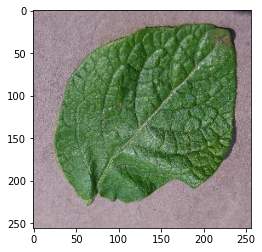

In [80]:
result23 = model.predict_classes([prepare('C:\\Users\\RoboRock\\Projects\\Leditor2\\Check\\Potato___healthy.JPG')])
disease23=image.load_img('C:\\Users\\RoboRock\\Projects\\Leditor2\\Check\\Potato___healthy.JPG')
plt.imshow(disease23)
print (Classes[int(result23)])

Raspberry___healthy


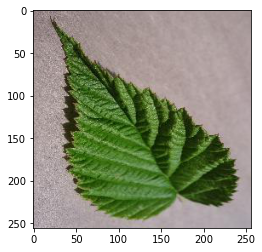

In [81]:
result24 = model.predict_classes([prepare('C:\\Users\\RoboRock\\Projects\\Leditor2\\Check\\Raspberry___healthy.JPG')])
disease24=image.load_img('C:\\Users\\RoboRock\\Projects\\Leditor2\\Check\\Raspberry___healthy.JPG')
plt.imshow(disease24)
print (Classes[int(result24)])

Soybean___healthy


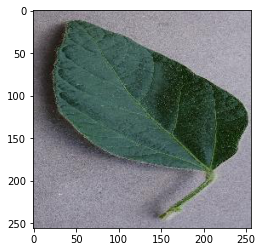

In [82]:
result25 = model.predict_classes([prepare('C:\\Users\\RoboRock\\Projects\\Leditor2\\Check\\Soybean___healthy.JPG')])
disease25=image.load_img('C:\\Users\\RoboRock\\Projects\\Leditor2\\Check\\Soybean___healthy.JPG')
plt.imshow(disease25)
print (Classes[int(result25)])

Squash___Powdery_mildew


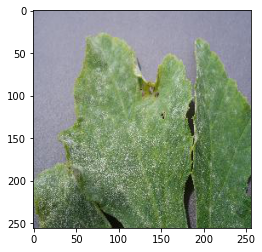

In [83]:
result26 = model.predict_classes([prepare('C:\\Users\\RoboRock\\Projects\\Leditor2\\Check\\Squash___Powdery_mildew.JPG')])
disease26=image.load_img('C:\\Users\\RoboRock\\Projects\\Leditor2\\Check\\Squash___Powdery_mildew.JPG')
plt.imshow(disease26)
print (Classes[int(result26)])

Strawberry___Leaf_scorch


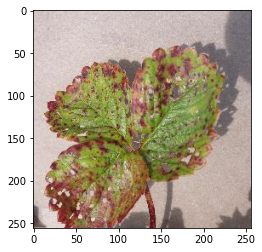

In [84]:
result27 = model.predict_classes([prepare('C:\\Users\\RoboRock\\Projects\\Leditor2\\Check\\Strawberry___Leaf_scorch.JPG')])
disease27=image.load_img('C:\\Users\\RoboRock\\Projects\\Leditor2\\Check\\Strawberry___Leaf_scorch.JPG')
plt.imshow(disease27)
print (Classes[int(result27)])

Strawberry___healthy


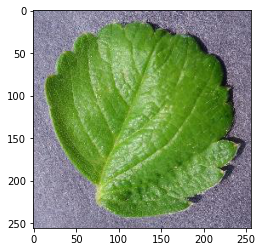

In [85]:
result28 = model.predict_classes([prepare('C:\\Users\\RoboRock\\Projects\\Leditor2\\Check\\Strawberry___healthy.JPG')])
disease28=image.load_img('C:\\Users\\RoboRock\\Projects\\Leditor2\\Check\\Strawberry___healthy.JPG')
plt.imshow(disease28)
print (Classes[int(result28)])

Tomato___Bacterial_spot


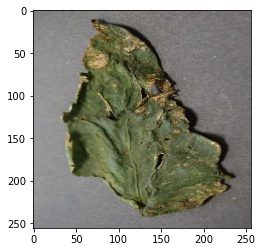

In [86]:
result29 = model.predict_classes([prepare('C:\\Users\\RoboRock\\Projects\\Leditor2\\Check\\Tomato___Bacterial_spot.JPG')])
disease29=image.load_img('C:\\Users\\RoboRock\\Projects\\Leditor2\\Check\\Tomato___Bacterial_spot.JPG')
plt.imshow(disease29)
print (Classes[int(result29)])

Tomato___Early_blight


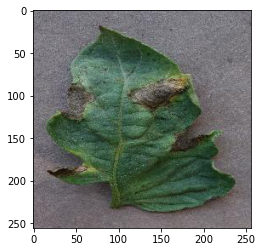

In [87]:
result30 = model.predict_classes([prepare('C:\\Users\\RoboRock\\Projects\\Leditor2\\Check\\Tomato___Early_blight.JPG')])
disease30=image.load_img('C:\\Users\\RoboRock\\Projects\\Leditor2\\Check\\Tomato___Early_blight.JPG')
plt.imshow(disease30)
print (Classes[int(result30)])

Tomato___Late_blight


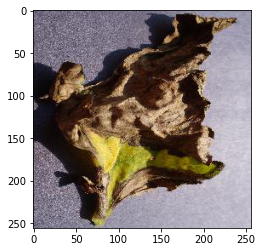

In [88]:
result31 = model.predict_classes([prepare('C:\\Users\\RoboRock\\Projects\\Leditor2\\Check\\Tomato___Late_blight.JPG')])
disease31=image.load_img('C:\\Users\\RoboRock\\Projects\\Leditor2\\Check\\Tomato___Late_blight.JPG')
plt.imshow(disease31)
print (Classes[int(result31)])

Tomato___Leaf_Mold


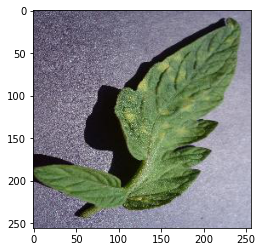

In [89]:
result32 = model.predict_classes([prepare('C:\\Users\\RoboRock\\Projects\\Leditor2\\Check\\Tomato___Leaf_Mold.JPG')])
disease32=image.load_img('C:\\Users\\RoboRock\\Projects\\Leditor2\\Check\\Tomato___Leaf_Mold.JPG')
plt.imshow(disease32)
print (Classes[int(result32)])

Tomato___Septoria_leaf_spot


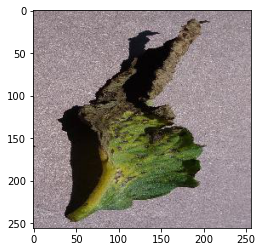

In [90]:
result33 = model.predict_classes([prepare('C:\\Users\\RoboRock\\Projects\\Leditor2\\Check\\Tomato___Septoria_leaf_spot.JPG')])
disease33=image.load_img('C:\\Users\\RoboRock\\Projects\\Leditor2\\Check\\Tomato___Septoria_leaf_spot.JPG')
plt.imshow(disease33)
print (Classes[int(result33)])

Tomato___Spider_mites Two-spotted_spider_mite


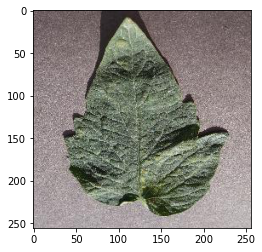

In [91]:
result34 = model.predict_classes([prepare('C:\\Users\\RoboRock\\Projects\\Leditor2\\Check\\Tomato___Spider_mites Two-spotted_spider_mite.JPG')])
disease34=image.load_img('C:\\Users\\RoboRock\\Projects\\Leditor2\\Check\\Tomato___Spider_mites Two-spotted_spider_mite.JPG')
plt.imshow(disease34)
print (Classes[int(result34)])

Tomato___Target_Spot


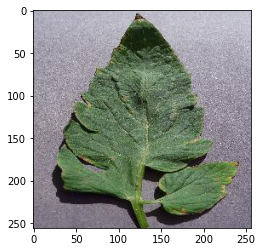

In [92]:
result35 = model.predict_classes([prepare('C:\\Users\\RoboRock\\Projects\\Leditor2\\Check\\Tomato___Target_Spot.JPG')])
disease35=image.load_img('C:\\Users\\RoboRock\\Projects\\Leditor2\\Check\\Tomato___Target_Spot.JPG')
plt.imshow(disease35)
print (Classes[int(result35)])

Tomato___Tomato_Yellow_Leaf_Curl_Virus


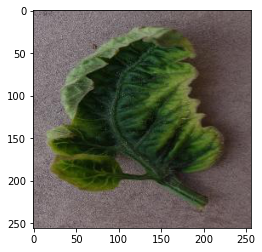

In [93]:
result36 = model.predict_classes([prepare('C:\\Users\\RoboRock\\Projects\\Leditor2\\Check\\Tomato___Tomato_Yellow_Leaf_Curl_Virus.JPG')])
disease36=image.load_img('C:\\Users\\RoboRock\\Projects\\Leditor2\\Check\\Tomato___Tomato_Yellow_Leaf_Curl_Virus.JPG')
plt.imshow(disease36)
print (Classes[int(result36)])

Tomato___Tomato_mosaic_virus


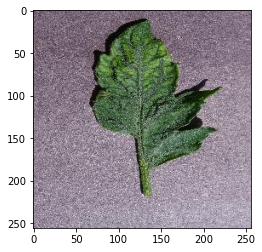

In [94]:
result37 = model.predict_classes([prepare('C:\\Users\\RoboRock\\Projects\\Leditor2\\Check\\Tomato___Tomato_mosaic_virus.JPG')])
disease37=image.load_img('C:\\Users\\RoboRock\\Projects\\Leditor2\\Check\\Tomato___Tomato_mosaic_virus.JPG')
plt.imshow(disease37)
print (Classes[int(result37)])

Tomato___healthy


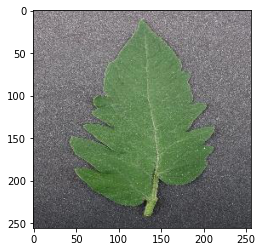

In [95]:
result38 = model.predict_classes([prepare('C:\\Users\\RoboRock\\Projects\\Leditor2\\Check\\Tomato___healthy.JPG')])
disease38=image.load_img('C:\\Users\\RoboRock\\Projects\\Leditor2\\Check\\Tomato___healthy.JPG')
plt.imshow(disease38)
print (Classes[int(result38)])

fresh cotton leaf


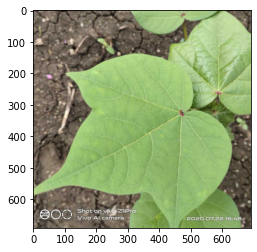

In [96]:
result39 = model.predict_classes([prepare('C:\\Users\\RoboRock\\Projects\\Leditor2\\Check\\fresh cotton leaf.JPG')])
disease39=image.load_img('C:\\Users\\RoboRock\\Projects\\Leditor2\\Check\\fresh cotton leaf.JPG')
plt.imshow(disease39)
print (Classes[int(result39)])

fresh cotton plant


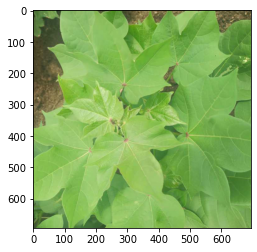

In [97]:
result40 = model.predict_classes([prepare('C:\\Users\\RoboRock\\Projects\\Leditor2\\Check\\fresh cotton plant.JPG')])
disease40=image.load_img('C:\\Users\\RoboRock\\Projects\\Leditor2\\Check\\fresh cotton plant.JPG')
plt.imshow(disease40)
print (Classes[int(result40)])

fusarium wilt diseased cotton leaf


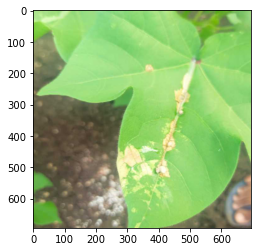

In [98]:
result41 = model.predict_classes([prepare('C:\\Users\\RoboRock\\Projects\\Leditor2\\Check\\fusarium wilt diseased cotton leaf.JPG')])
disease41=image.load_img('C:\\Users\\RoboRock\\Projects\\Leditor2\\Check\\fusarium wilt diseased cotton leaf.JPG')
plt.imshow(disease41)
print (Classes[int(result41)])

mango_Anthracnose


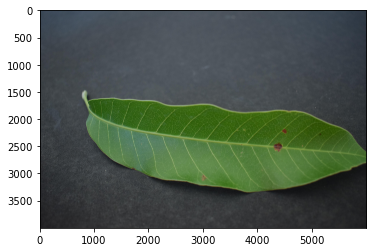

In [99]:
result42 = model.predict_classes([prepare('C:\\Users\\RoboRock\\Projects\\Leditor2\\Check\\mango_Anthracnose.JPG')])
disease42=image.load_img('C:\\Users\\RoboRock\\Projects\\Leditor2\\Check\\mango_Anthracnose.JPG')
plt.imshow(disease42)
print (Classes[int(result42)])

fusarium wilt diseased cotton plant


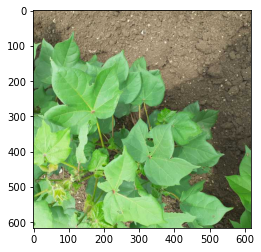

In [100]:
result43 = model.predict_classes([prepare('C:\\Users\\RoboRock\\Projects\\Leditor2\\Check\\fusarium wilt diseased cotton plant.JPG')])
disease43=image.load_img('C:\\Users\\RoboRock\\Projects\\Leditor2\\Check\\fusarium wilt diseased cotton plant.JPG')
plt.imshow(disease43)
print (Classes[int(result43)])

mango_healthy


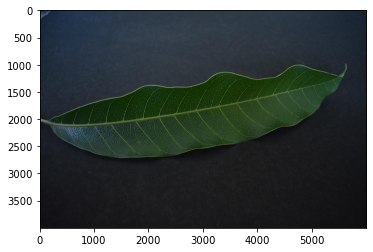

In [101]:
result44 = model.predict_classes([prepare('C:\\Users\\RoboRock\\Projects\\Leditor2\\Check\\mango_healthy.JPG')])
disease44=image.load_img('C:\\Users\\RoboRock\\Projects\\Leditor2\\Check\\mango_healthy.JPG')
plt.imshow(disease44)
print (Classes[int(result44)])

background


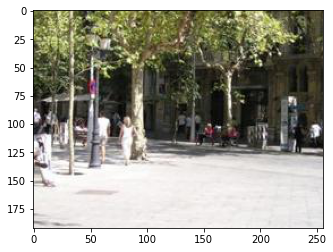

In [102]:
result45 = model.predict_classes([prepare('C:\\Users\\RoboRock\\Projects\\Leditor2\\Check\\bg1.JPG')])
disease45=image.load_img('C:\\Users\\RoboRock\\Projects\\Leditor2\\Check\\bg1.JPG')
plt.imshow(disease45)
print (Classes[int(result45)])

background


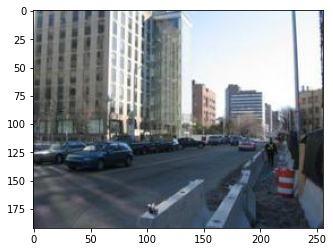

In [103]:
result46 = model.predict_classes([prepare('C:\\Users\\RoboRock\\Projects\\Leditor2\\Check\\bg2.JPG')])
disease46=image.load_img('C:\\Users\\RoboRock\\Projects\\Leditor2\\Check\\bg2.JPG')
plt.imshow(disease46)
print (Classes[int(result46)])

background


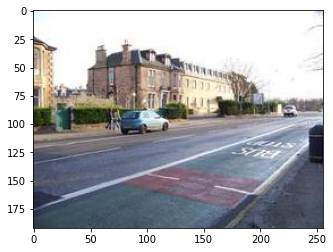

In [104]:
result47 = model.predict_classes([prepare('C:\\Users\\RoboRock\\Projects\\Leditor2\\Check\\bg3.JPG')])
disease47=image.load_img('C:\\Users\\RoboRock\\Projects\\Leditor2\\Check\\bg3.JPG')
plt.imshow(disease47)
print (Classes[int(result47)])

background


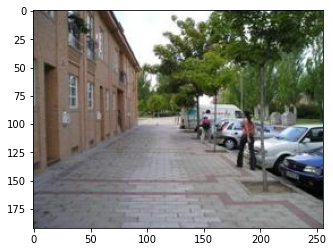

In [105]:
result48 = model.predict_classes([prepare('C:\\Users\\RoboRock\\Projects\\Leditor2\\Check\\bg4.JPG')])
disease48=image.load_img('C:\\Users\\RoboRock\\Projects\\Leditor2\\Check\\bg4.JPG')
plt.imshow(disease48)
print (Classes[int(result48)])

Apple___Cedar_apple_rust


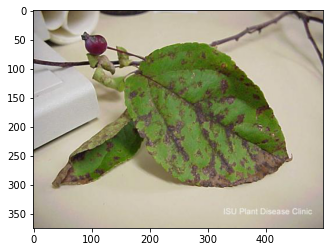

In [30]:
result49 = model.predict_classes([prepare('C:\\Users\\RoboRock\\Projects\\Leditor2\\Check\\Apple___Apple_scab1.JPG')])
disease49=image.load_img('C:\\Users\\RoboRock\\Projects\\Leditor2\\Check\\Apple___Apple_scab1.JPG')
plt.imshow(disease49)
print (Classes[int(result49)])

Peach___Bacterial_spot


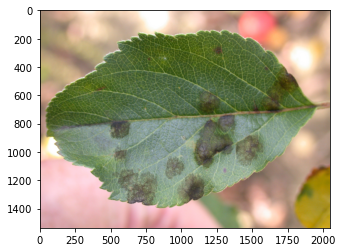

In [32]:
result50 = model.predict_classes([prepare('C:\\Users\\RoboRock\\Projects\\Leditor2\\Check\\Apple___Apple_scab2.png')])
disease50=image.load_img('C:\\Users\\RoboRock\\Projects\\Leditor2\\Check\\Apple___Apple_scab2.png')
plt.imshow(disease50)
print (Classes[int(result50)])

fusarium wilt diseased cotton plant


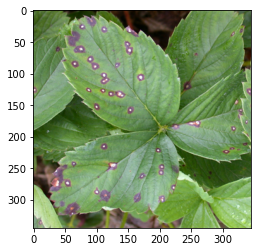

In [35]:
result51 = model.predict_classes([prepare('C:\\Users\\RoboRock\\Projects\\Leditor2\\Check\\12.jpg')])
disease51=image.load_img('C:\\Users\\RoboRock\\Projects\\Leditor2\\Check\\12.jpg')
plt.imshow(disease51)
print (Classes[int(result51)])

In [ ]:
#Convert Model To "tflite format

In [55]:
#import tensorflow as tf
converter = tf.compat.v1.lite.TFLiteConverter.from_keras_model_file('C:\\Users\\RoboRock\\Projects\\Leditor2\\model.h5') 
tfmodel = converter.convert() 
open ("model.tflite" , "wb") .write(tfmodel)

C:\Anaconda\lib\site-packages\tensorflow\python\keras\backend.py:434: UserWarning: `tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.
  warnings.warn('`tf.keras.backend.set_learning_phase` is deprecated and '


INFO:tensorflow:Assets written to: C:\Users\RoboRock\AppData\Local\Temp\tmpe60etg42\assets
Instructions for updating:
This function will only be available through the v1 compatibility library as tf.compat.v1.saved_model.loader.load or tf.compat.v1.saved_model.load. There will be a new function for importing SavedModels in Tensorflow 2.0.
INFO:tensorflow:Restoring parameters from C:\Users\RoboRock\AppData\Local\Temp\tmpe60etg42\variables\variables
INFO:tensorflow:The given SavedModel MetaGraphDef contains SignatureDefs with the following keys: {'serving_default', '__saved_model_init_op'}
INFO:tensorflow:input tensors info: 
INFO:tensorflow:Tensor's key in saved_model's tensor_map: conv2d_input
INFO:tensorflow: tensor name: serving_default_conv2d_input:0, shape: (-1, 256, 256, 3), type: DT_FLOAT
INFO:tensorflow:output tensors info: 
INFO:tensorflow:Tensor's key in saved_model's tensor_map: dense_2
INFO:tensorflow: tensor name: StatefulPartitionedCall:0, shape: (-1, 45), type: DT_FLOAT
IN

47729788

In [ ]:
#END OF PROJECT Training Phase